# Convolutional Neural Network

Que1: What is CNN? How does it work behind the scenes?

Que2: What are Stride, Padding, Kernel Filters, and Pooling?

Que3: Why does Overfitting happen in CNN, and how can you avoid it?

Que4: Why is InceptionNet better than VGG?

Que5: What is Augmentation?

Que6: Can you explain the concept of feature maps in CNNs?

# Ans 1 

A Convolutional Neural Network (CNN) is a type of artificial neural network designed for solving
complex dataset, like images. CNNs are widely used in various tasks such as image 
recognition, object detection 
how CNNs work behind the scenes:
    
1 Input Image: An image.
2 Convolution: Apply filters to detect edges, textures, etc.
3 Activation Function:: Apply ReLU to introduce non-linearity.
4 Pooling: Reduce the size of the feature maps.
5 Flatten: Convert the final pooled feature maps into a single vector.
6 Fully Connected Layers: Use this vector to classify the image.
7 Output: Output the probabilities of objects in the image.

# Ans----2

1. Stride

Stride refers to the number of pixels by which we slide the filter/kernel over the input image.

2. Padding

Padding involves adding extra pixels around the border of the input image.

3. Kernel (Filters)

A kernel (or filter) is a small matrix used to apply for edge detection through convolution operations.
In CNNs, kernels are learned during the training process and are used to detect features such
as edges and patterns in the input image.

# Ans--3

Causes of Overfitting in CNNs:
    
Complex Models: Too many layers and parameters.
Insufficient Training Data: Small datasets cause the model to learn noise.
High Variance in Data.
Outliers.

Techniques to Avoid Overfitting:
Data Augmentation.
Dropout: Randomly ignore some neurons during training.
Regularization: Use L1 or L2 regularization to penalize large weights.
Cross-Validation.
Reduce the number of layers or units to make the model less complex.

# Ans---4

InceptionNet is better than VGG for several key reasons:

Efficiency: With different filter sizes and 1x1 convolutions to reduce dimensionality, making it more efficient than VGG.

Model Size: InceptionNet achieves high performance with a smaller model size, while VGG not.

Performance: InceptionNet generally achieves higher accuracy on benchmarks compared to VGG.


# Ans---5

Augmentation refers to the process of enhancing or improving Model.
Augmentation in the context of deep learning refers to the technique of artificially expanding 
the size of a dataset by creating modified versions of images or other data points through 
transformations like rotation, scaling, and flipping. Augmentation helps in improving the robustness 
of deep learning models.

# Ans---6

Feature maps in Convolutional Neural Networks (CNNs) are the result of applying filters (kernels) 
to input data.
This is likely to be eqeual as Features in Machine Learning.

# Machine Learning Techniques

### Problem statement and Objective

#### Black Friday Project

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.






### Data Variable Definition 
• User_ID User ID 


• Product_ID Product ID 


• Gender Sex of User 


• Age Age in bins 


• Occupation Occupation (Masked)


• City_Category Category of the City (A,B,C) 


• Stay_In_Current_City_Years Number of years stay in current city 


• Marital_Status Marital Status 


• Product_Category_1 Product Category (Masked)


• Product_Category_2 Product may belongs to other category also (Masked) 


• Product_Category_3 Product may belongs to other category also (Masked)


• Purchase Purchase Amount (Target Variable) 



### Goal

Our goal is to predict the purchase amount of customers for various products after completing all the necessary preprocessing steps. Additionally, hyperparameter tuning and cross validation is essential. We also need to apply feature selection techniques such as SelectKBest, VIF, and PCA. 

#Dataset Link


https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv


You have to use multiple algorithms to build the model, and whichever algorithm performs the best, you have to do hyperparameter tuning for it. After tuning the hyperparameters, you also need to plot its best fit line.

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [153]:
data = pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [154]:
data.shape

(550068, 12)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [156]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [157]:
data.Product_Category_2.value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [158]:
mode = data.Product_Category_2.mode()[0]

In [159]:
data.Product_Category_2.fillna(mode,inplace=True)

In [160]:
mode_2 = data.Product_Category_3.mode()[0]

In [161]:
data.Product_Category_3.fillna(mode_2,inplace=True)

In [162]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [163]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [164]:
le = LabelEncoder()

# Apply label encoding to the categorical columns
data['Gender'] = le.fit_transform(data['Gender'])
data['Product_ID'] = le.fit_transform(data['Product_ID'])
data['City_Category'] = le.fit_transform(data['City_Category'])
data['Age'] = le.fit_transform(data['Age'])

data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,2734,1,6,16,2,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,8.0,16.0,368
550064,1006035,3568,0,2,1,2,3,0,20,8.0,16.0,371
550065,1006036,3568,0,2,15,1,4+,1,20,8.0,16.0,137
550066,1006038,3568,0,6,1,2,2,0,20,8.0,16.0,365


In [165]:
data['Stay_In_Current_City_Years'] = [i.strip("+") for i in data.Stay_In_Current_City_Years]

In [166]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,2734,1,6,16,2,4,0,8,8.0,16.0,7969


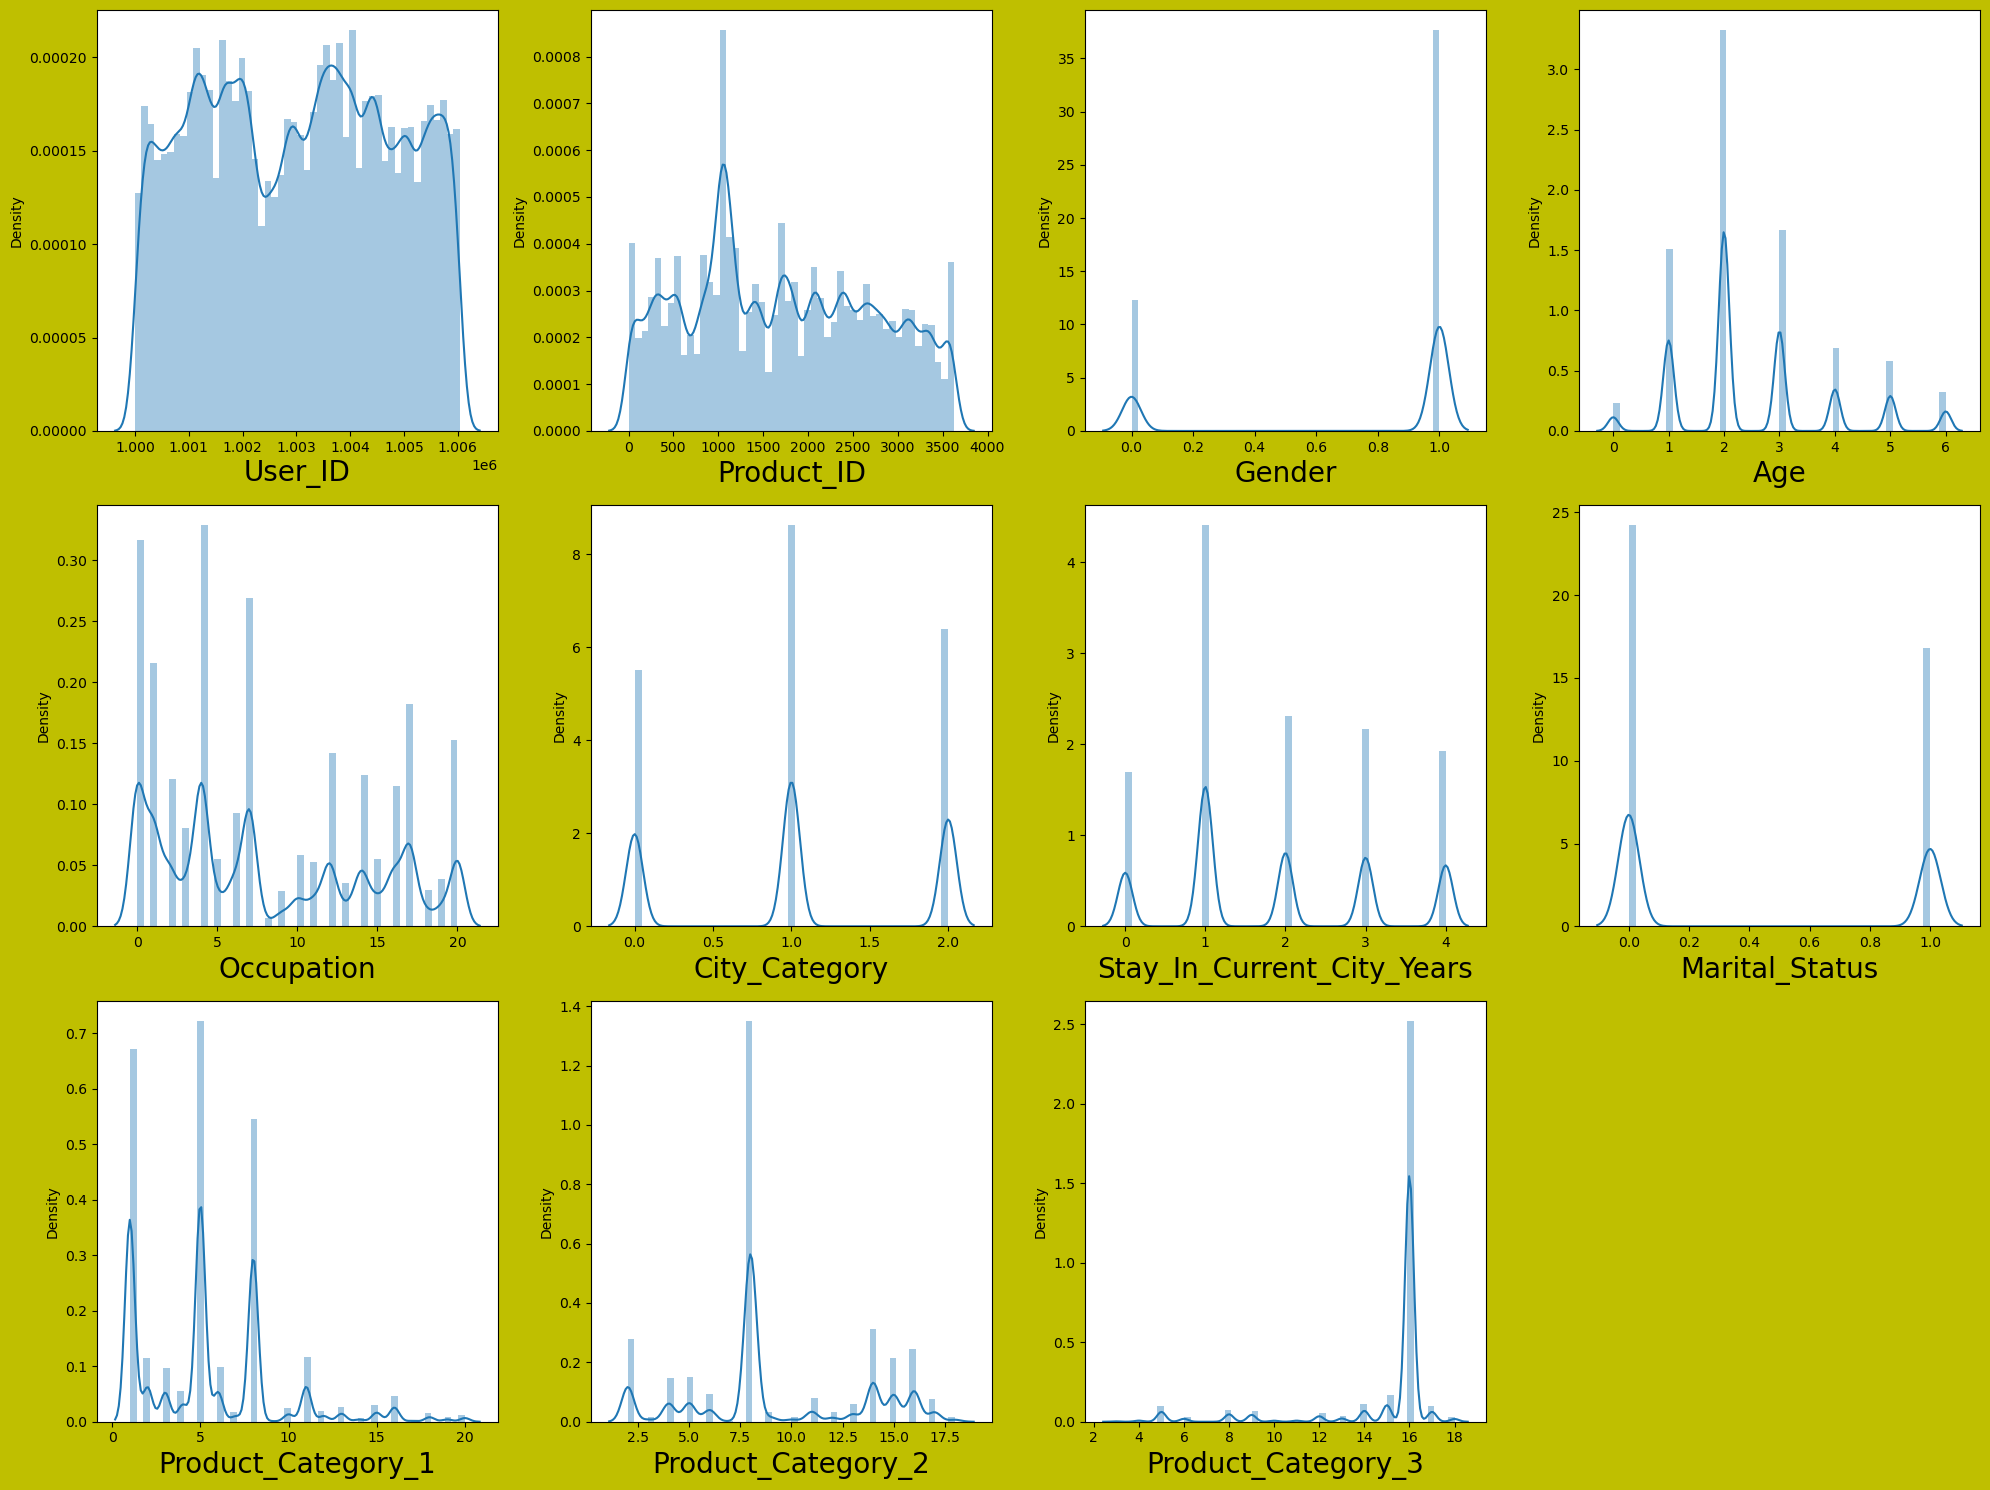

In [167]:
plt.figure(figsize=(20,15),facecolor='y')
plotnumber=1
for i in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [168]:
data.drop(columns={'User_ID','Product_ID'},inplace=True)

In [169]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,8.0,16.0,1422
3,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,6,16,2,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,8.0,16.0,368
550064,0,2,1,2,3,0,20,8.0,16.0,371
550065,0,2,15,1,4,1,20,8.0,16.0,137
550066,0,6,1,2,2,0,20,8.0,16.0,365


In [170]:
X = data.drop(columns={'Purchase'})
Y = data[['Purchase']]

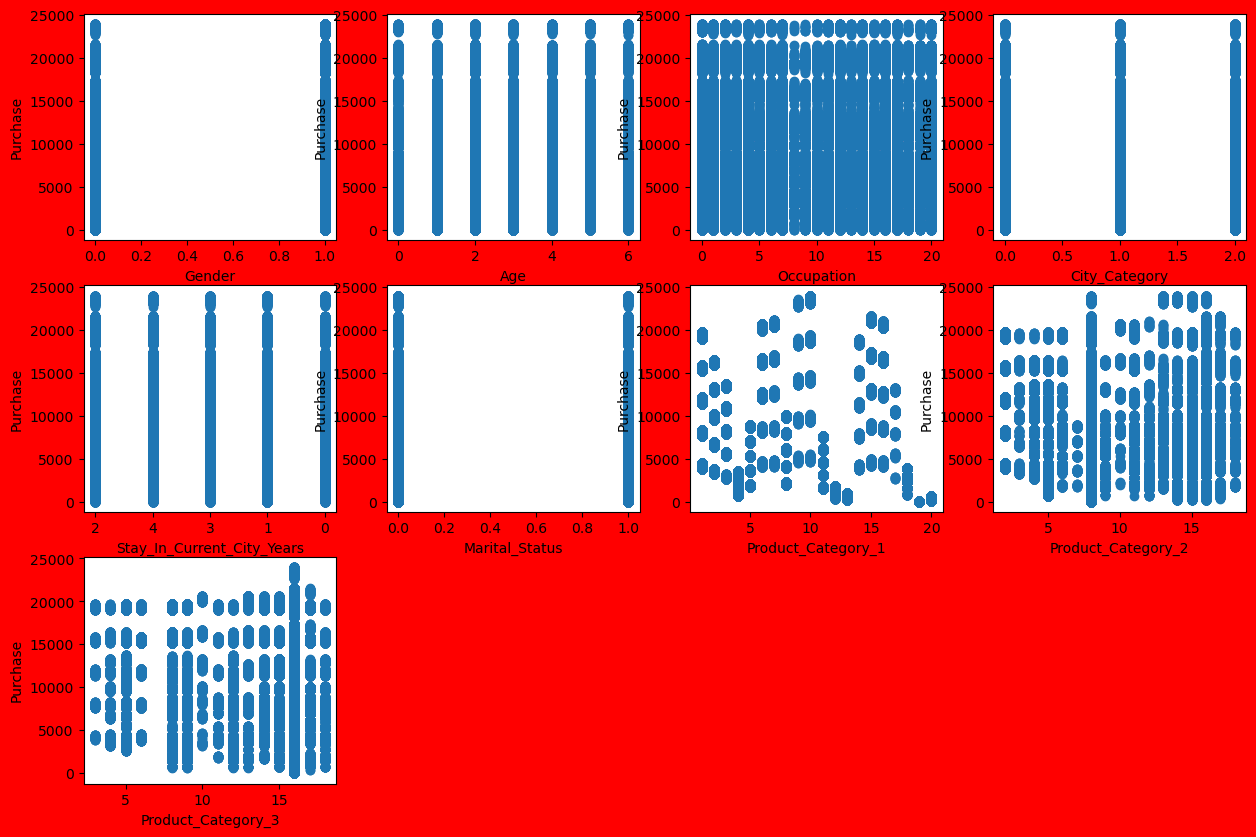

In [171]:
plt.figure(figsize=(15,10),facecolor='r')
plotnumber=1
for i in X:
    if plotnumber <=9:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(X[i],Y)
        plt.xlabel(i , fontsize=10)
        plt.ylabel('Purchase',fontsize=10)
    plotnumber +=1
plt.show()

In [172]:
data.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.041075,0.037073,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.003452,-0.022668,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,-0.012445,0.041075,0.001566,-0.003452,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.006003,0.037073,0.000246,-0.022668,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


<Axes: >

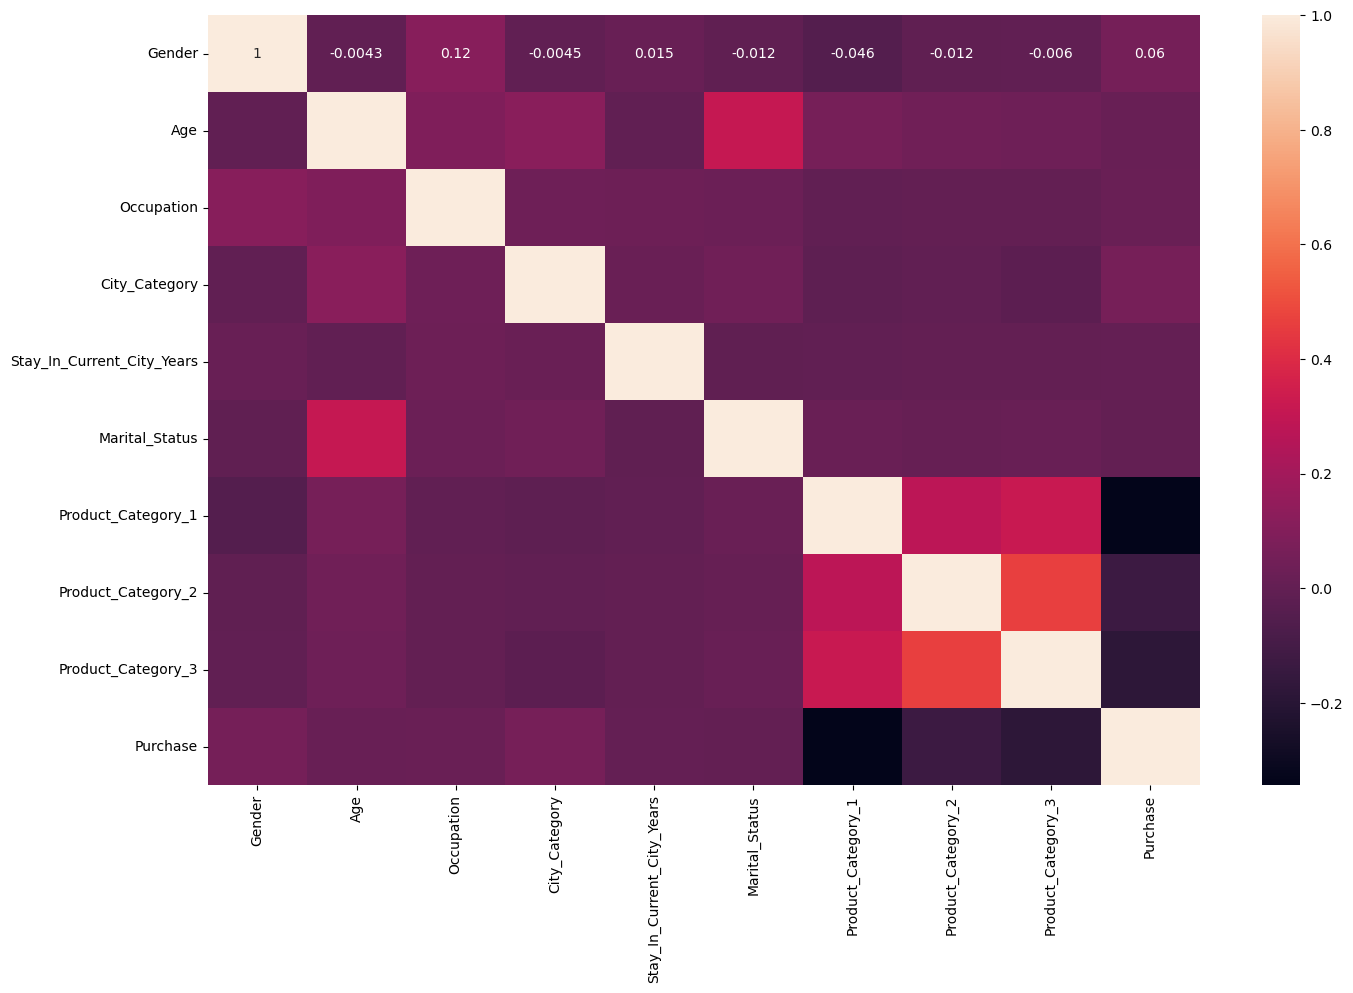

In [173]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot = True)

In [174]:
scaler = StandardScaler()
scaler

StandardScaler()

In [175]:
X_scaled=scaler.fit_transform(X)

In [176]:
vif = pd.DataFrame()
vif['Vif']=[variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]

vif['Features']=X.columns

In [177]:
vif

,Vif,Features
0,1.016550,Gender
1,1.136199,Age
2,1.024218,Occupation
3,1.017419,City_Category
4,1.001632,Stay_In_Current_City_Years
5,1.107967,Marital_Status
6,1.145926,Product_Category_1
7,1.305931,Product_Category_2
8,1.339848,Product_Category_3


In [178]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.53260809, -2.17219136,  0.58591146, ..., -0.81939374,
        -0.54547833,  0.5082873 ],
       [ 1.50380955, -2.01239271,  0.65145827, ..., -0.84595978,
        -0.49525128,  0.33611847],
       [-0.62438403, -2.30820219,  0.67867311, ...,  1.08847795,
        -0.88891897,  0.27305024],
       ...,
       [-2.07294866,  0.4143859 ,  0.4472472 , ...,  2.62479342,
        -1.75626495,  0.08235239],
       [-2.3031574 ,  0.9799292 ,  2.04390237, ...,  3.25515616,
         1.71761965,  0.21578392],
       [-2.27082958,  0.78984766,  2.03369463, ...,  2.88751279,
        -0.36362347,  0.11160546]])

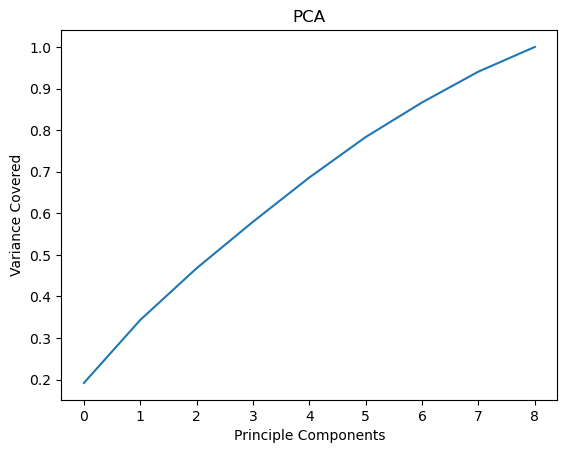

In [179]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [180]:
pca=PCA(n_components=9)
new_pump=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PCA7','PCA8','PCA9'])

In [181]:
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PCA7,PCA8,PCA9
0,0.532608,-2.172191,0.585911,0.077427,0.713752,1.622562,-0.819394,-0.545478,0.508287
1,1.503810,-2.012393,0.651458,0.066099,0.750783,1.645317,-0.845960,-0.495251,0.336118
2,-0.624384,-2.308202,0.678673,0.121025,0.729214,1.838858,1.088478,-0.888919,0.273050
3,-1.445231,-2.450526,0.580291,0.141497,0.648732,1.753889,0.493885,-0.810781,-0.662297
4,-0.663625,1.930903,-1.518319,1.694774,-0.224703,0.348371,0.923708,1.895635,0.482829
...,...,...,...,...,...,...,...,...,...
550063,-2.307812,1.915948,-0.080288,-0.999105,0.219969,0.381950,3.156689,-0.094952,0.090710
550064,-1.854516,-0.954162,1.533034,2.151589,-0.682434,0.576463,3.013673,-0.405519,0.153837
550065,-2.072949,0.414386,0.447247,1.584619,1.287079,1.915428,2.624793,-1.756265,0.082352
550066,-2.303157,0.979929,2.043902,1.423902,-0.846968,0.640679,3.255156,1.717620,0.215784


In [182]:
lr = LinearRegression()
lr

LinearRegression()

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=250)

In [184]:
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
print('Co-efficient =',lr.coef_)
print('Intercept = ',lr.intercept_)

Co-efficient = [[ 513.18405746  120.8924044     7.0483413   338.16249104    5.52097982
   -61.21788112 -401.99428619   -3.07220069 -153.70150436]]
Intercept =  [12689.72691499]


In [186]:
y_pred = lr.predict(X_test)

In [187]:
print("R2_score = ",r2_score(y_test,y_pred))

R2_score =  0.13232537188538873


In [188]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse =",np.sqrt(mse))

mae =  3581.1967014484444
mse =  21901385.391263176
rmse = 4679.891600375288


In [189]:
# importing decisiontree

from sklearn.tree import DecisionTreeRegressor

In [190]:
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [191]:
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [192]:
mse = mean_squared_error(y_test, y_pred_dtc)
mae = mean_absolute_error(y_test, y_pred_dtc)
r2 = r2_score(y_test, y_pred_dtc)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10918504.440364912
Mean Absolute Error: 2341.5426054457853
R^2 Score: 0.567437898990601


In [193]:
#importing Random Forest regressor

from sklearn.ensemble import RandomForestRegressor

In [194]:
rfc=RandomForestRegressor(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [195]:
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [196]:
mse = mean_squared_error(y_test, y_pred_rfc)
mae = mean_absolute_error(y_test, y_pred_rfc)
r2 = r2_score(y_test, y_pred_rfc)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 9311632.44002858
Mean Absolute Error: 2221.905539780291
R^2 Score: 0.631097893114799


# Conclusion

* Random Forest gave best Result.

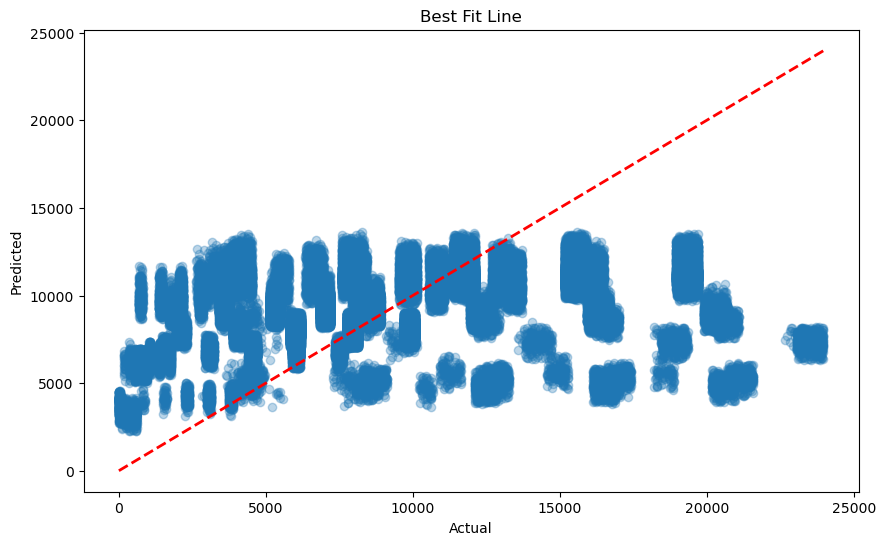

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Fit Line')
plt.show()